In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

In [3]:
df=pd.read_csv("Online_Retail.csv")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
print(f"{df.isnull().sum()}")

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [7]:
#since Description column have 1454 null values, dropping null values
df.dropna(inplace=True, axis=0)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.shape

(540455, 8)

In [9]:
df.drop(columns=['InvoiceNo','StockCode','CustomerID'], axis=1, inplace=True)
df.head(3)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom


In [10]:
# converting InvoiceDate dtype into Datetimd
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  540455 non-null  object        
 1   Quantity     540455 non-null  int64         
 2   InvoiceDate  540455 non-null  datetime64[ns]
 3   UnitPrice    540455 non-null  float64       
 4   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.7+ MB


In [11]:
# creating date column from InvoiceDate
df['Day']=df['InvoiceDate'].dt.day
df['Month']=df['InvoiceDate'].dt.month
df['Year']=df['InvoiceDate'].dt.year - 2000

#df['Hour']=df['InvoiceDate'].dt.hour
#df['Minute']=df['InvoiceDate'].dt.minute

df.drop(columns=['InvoiceDate'], axis=1, inplace=True)
df.head(5)

,Description,Quantity,UnitPrice,Country,Day,Month,Year
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1,12,10
1,WHITE METAL LANTERN,6,3.39,United Kingdom,1,12,10
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,1,12,10
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,1,12,10
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,1,12,10


In [12]:
df.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     11,     33,     13,     -4,
           -5,     -7,     -3,     70,    252,     60,    216,    384,
           27,     15,     22,     19,     17,     21,     34,     47,
          108,     52,  -9360,     75,    270,     42,    240,     90,
          320,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     39,    -48,    -50,     56,     26,   1440,
           31,     82,     78,     97,     98,     35,    -30,     -8,
          720,    -20,    156,    324,     38,     37,     49,     95,
           -9,    -11,     29,     41,    -10,    -72,    -35,    -43,
      

In [13]:
# negative values can't consider for quantity(drop)
df[df['Quantity'] < 1].index

Index([   141,    154,    235,    236,    237,    238,    239,    240,    241,
          939,
       ...
       540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715, 541716,
       541717],
      dtype='int64', length=9762)

In [14]:
# negative quantity cannot be considerable, so drop those
df.drop(df[df['Quantity'] < 1].index, axis=0, inplace=True)
df.shape

(530693, 7)

In [15]:
df[df['Quantity'] < 1].index

Index([], dtype='int64')

In [16]:
df.head(4)

,Description,Quantity,UnitPrice,Country,Day,Month,Year
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1,12,10
1,WHITE METAL LANTERN,6,3.39,United Kingdom,1,12,10
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,1,12,10
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,1,12,10


In [17]:
df.UnitPrice.value_counts()

UnitPrice
1.25       49753
1.65       37498
0.85       28061
2.95       27106
0.42       24302
           ...  
156.45         1
28.66          1
46.86          1
84.21          1
1714.17        1
Name: count, Length: 1293, dtype: int64

In [18]:
#dropping unitprice less than 1 (0 also cannot be price of item)

df.drop(df[df['UnitPrice']<1].index, axis=0, inplace=True)
print(f"{df[df['UnitPrice']<1].index}")
print(f"{df.shape}")

Index([], dtype='int64')
(419211, 7)


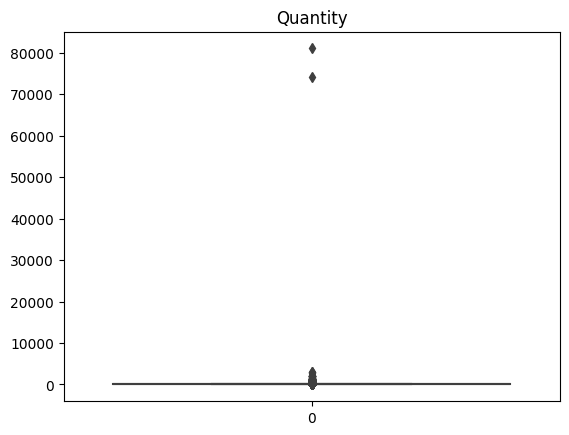

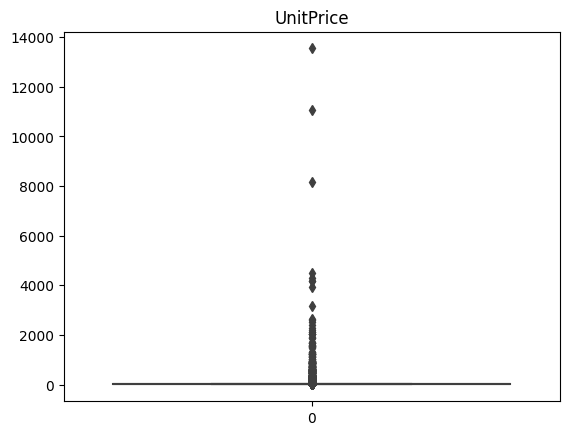

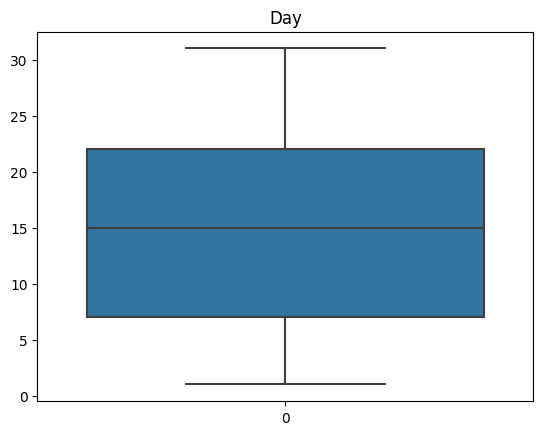

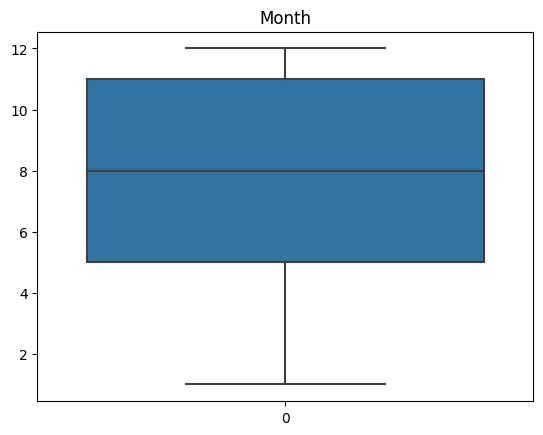

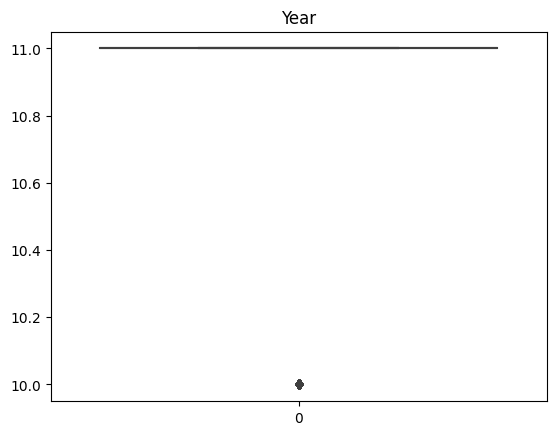

In [19]:
for column in df.select_dtypes(include=np.number):
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

In [20]:
# i have drop whose quantity >40
df[df['Quantity']>40].shape

(10759, 7)

In [21]:
df.drop(df[df['Quantity']>40].index, axis=0, inplace=True)
print(f"{df[df['Quantity']>40].shape}")
print(f"{df.shape}")

(0, 7)
(408452, 7)


In [22]:
# dropped whose unitprice >30
df[df['UnitPrice']>30].shape

(1684, 7)

In [23]:
df.drop(df[df['UnitPrice']>30].index, axis=0, inplace=True)
print(f"{df[df['UnitPrice']>30].shape}")
print(f"{df.shape}")

(0, 7)
(406768, 7)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406768 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  406768 non-null  object 
 1   Quantity     406768 non-null  int64  
 2   UnitPrice    406768 non-null  float64
 3   Country      406768 non-null  object 
 4   Day          406768 non-null  int32  
 5   Month        406768 non-null  int32  
 6   Year         406768 non-null  int32  
dtypes: float64(1), int32(3), int64(1), object(2)
memory usage: 20.2+ MB


In [25]:
#convert unitprice into int
df.UnitPrice =df.UnitPrice.astype(int)
df.UnitPrice.dtype

dtype('int64')

In [26]:
df.head(3)

,Description,Quantity,UnitPrice,Country,Day,Month,Year
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2,United Kingdom,1,12,10
1,WHITE METAL LANTERN,6,3,United Kingdom,1,12,10
2,CREAM CUPID HEARTS COAT HANGER,8,2,United Kingdom,1,12,10


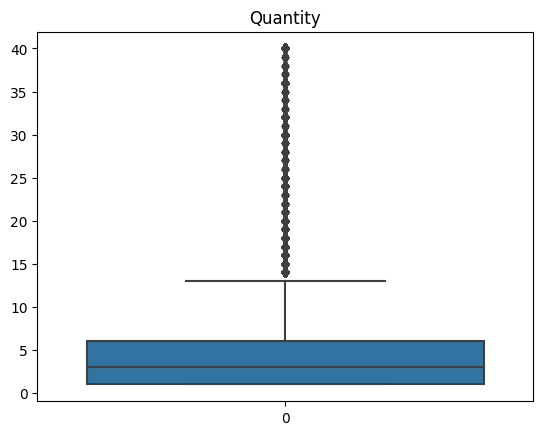

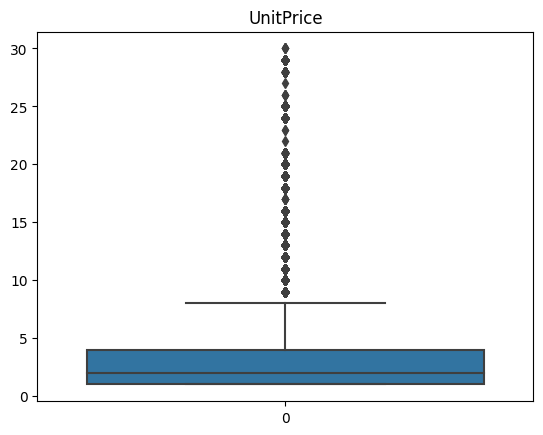

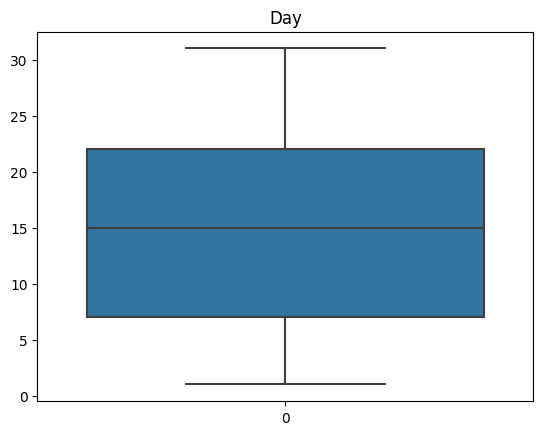

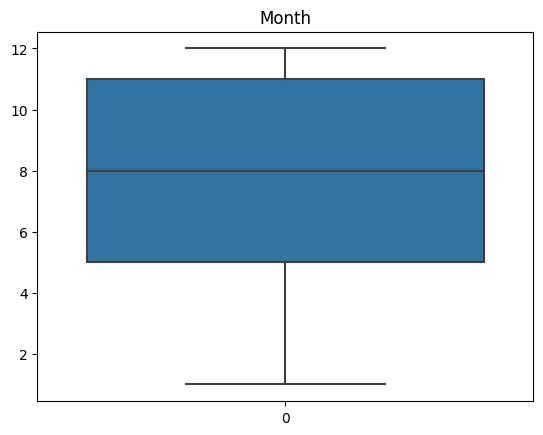

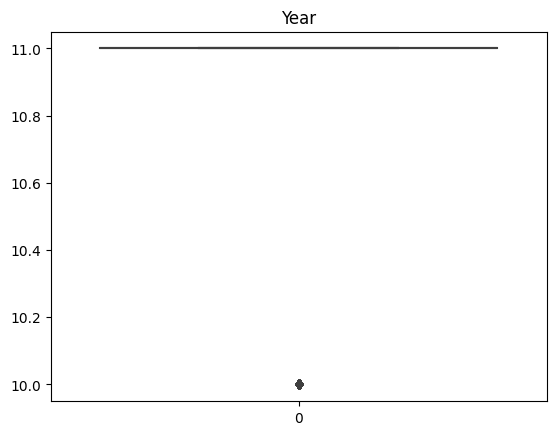

In [27]:
for column in df.select_dtypes(include=np.number):
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

In [28]:
df.Country.value_counts()

Country
United Kingdom          374963
Germany                   6757
France                    6206
EIRE                      5687
Spain                     1940
Belgium                   1525
Switzerland               1398
Portugal                  1148
Norway                     763
Netherlands                710
Italy                      637
Channel Islands            600
Australia                  555
Cyprus                     519
Finland                    449
Unspecified                330
Austria                    298
Poland                     263
Denmark                    262
Hong Kong                  221
Israel                     205
Sweden                     201
Singapore                  143
Iceland                    137
USA                        127
Greece                     116
Japan                      112
Canada                      98
Malta                       98
RSA                         54
European Community          52
United Arab Emirates        50


In [29]:
df['Country'].value_counts()[df['Country'].value_counts() > 500]


Country
United Kingdom     374963
Germany              6757
France               6206
EIRE                 5687
Spain                1940
Belgium              1525
Switzerland          1398
Portugal             1148
Norway                763
Netherlands           710
Italy                 637
Channel Islands       600
Australia             555
Cyprus                519
Name: count, dtype: int64

In [30]:
print(f"{df['Country'].value_counts()[df['Country'].value_counts() < 500].sum()}")
print(f"{df.shape}")

3360
(406768, 7)


In [31]:
filtered_countries = df['Country'].value_counts()[df['Country'].value_counts() < 500].index
df.drop(df[df['Country'].isin(filtered_countries)].index, axis=0, inplace=True)

print(f"{df['Country'].value_counts()[df['Country'].value_counts() < 500].sum()}")
print(f"{df.shape}")

0
(403408, 7)


In [32]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Portugal', 'Italy', 'Belgium',
       'Channel Islands', 'Spain', 'Cyprus'], dtype=object)

In [33]:
df.head(5)

,Description,Quantity,UnitPrice,Country,Day,Month,Year
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2,United Kingdom,1,12,10
1,WHITE METAL LANTERN,6,3,United Kingdom,1,12,10
2,CREAM CUPID HEARTS COAT HANGER,8,2,United Kingdom,1,12,10
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3,United Kingdom,1,12,10
4,RED WOOLLY HOTTIE WHITE HEART.,6,3,United Kingdom,1,12,10


In [34]:
df[df.Description == "WHITE METAL LANTERN"].shape

(315, 7)

In [35]:
df['Description']=df['Description'].str.strip()
df.head(4)

,Description,Quantity,UnitPrice,Country,Day,Month,Year
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2,United Kingdom,1,12,10
1,WHITE METAL LANTERN,6,3,United Kingdom,1,12,10
2,CREAM CUPID HEARTS COAT HANGER,8,2,United Kingdom,1,12,10
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3,United Kingdom,1,12,10


In [36]:
df[df.Description == "WHITE HANGING HEART T-LIGHT HOLDER"].shape

(2207, 7)

In [37]:
df.shape

(403408, 7)

In [38]:
filtered_Description = df['Description'].value_counts()[df['Description'].value_counts() < 300].index
df.drop(df[df['Description'].isin(filtered_Description)].index, axis=0, inplace=True)

print(f"{df['Description'].value_counts()[df['Description'].value_counts() < 300].sum()}")
print(f"{df.shape}")

0
(202341, 7)


In [39]:
df.head(4)

,Description,Quantity,UnitPrice,Country,Day,Month,Year
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2,United Kingdom,1,12,10
1,WHITE METAL LANTERN,6,3,United Kingdom,1,12,10
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3,United Kingdom,1,12,10
4,RED WOOLLY HOTTIE WHITE HEART.,6,3,United Kingdom,1,12,10


In [40]:
df['Total_price'] = df.Quantity * df.UnitPrice
df.head(5)

,Description,Quantity,UnitPrice,Country,Day,Month,Year,Total_price
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2,United Kingdom,1,12,10,12
1,WHITE METAL LANTERN,6,3,United Kingdom,1,12,10,18
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3,United Kingdom,1,12,10,18
4,RED WOOLLY HOTTIE WHITE HEART.,6,3,United Kingdom,1,12,10,18
5,SET 7 BABUSHKA NESTING BOXES,2,7,United Kingdom,1,12,10,14


In [41]:
# perform one hot encoding:

f_df = pd.get_dummies(df, columns=['Description', 'Country'], drop_first=True, dtype=int)
print(f"{f_df.shape}")
f_df.head(5)

(202341, 391)


,Quantity,UnitPrice,Day,Month,Year,Total_price,Description_3 HOOK PHOTO SHELF ANTIQUE WHITE,Description_3 PIECE SPACEBOY COOKIE CUTTER SET,Description_3 STRIPEY MICE FELTCRAFT,Description_36 PENCILS TUBE RED RETROSPOT,...,Country_EIRE,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Norway,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,6,2,1,12,10,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,3,1,12,10,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6,3,1,12,10,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,3,1,12,10,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2,7,1,12,10,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
from sklearn.model_selection import train_test_split
x=f_df.drop('Total_price', axis=1)
y=f_df.Total_price

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=34, test_size=0.47)
print(f"{x_train.shape}")
print(f"{x_test.shape}")

(107240, 390)
(95101, 390)


In [42]:
final_df=pd.concat([x_test,y_test],axis=1)
final_df.to_csv("final_data.csv")
final_df.shape

(95101, 391)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dff= pd.read_csv('final_data.csv')
dff.drop(['Unnamed: 0'], axis=1, inplace=True)
dff.head(4)

,Quantity,UnitPrice,Day,Month,Year,Description_3 HOOK PHOTO SHELF ANTIQUE WHITE,Description_3 PIECE SPACEBOY COOKIE CUTTER SET,Description_3 STRIPEY MICE FELTCRAFT,Description_36 PENCILS TUBE RED RETROSPOT,Description_4 TRADITIONAL SPINNING TOPS,...,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Norway,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom,Total_price
0,12,5,9,10,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,60
1,24,2,13,9,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,48
2,24,4,5,12,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,96
3,6,1,2,12,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6


In [3]:
dff.shape

(95101, 391)

In [4]:
#import pandas as pd
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler



# Separate the features and target variable
#X = df.drop('Total_price', axis=1)
#y = df['Total_price']

# Standardize the features
#scaler = StandardScaler()
#X_std = scaler.fit_transform(X)

# Perform PCA
#pca = PCA()
#X_pca = pca.fit_transform(X_std)

# Explained variance ratio
#explained_var_ratio = pca.explained_variance_ratio_

# Principal components
#components = pca.components_

# Plot the scree plot
#import matplotlib.pyplot as plt
#plt.plot(range(1,len(explained_var_ratio)+1), explained_var_ratio, marker='o')
#plt.xlabel('Principal Component')
#plt.ylabel('Explained Variance Ratio')
#plt.show()

#print(f"pca explained variance: {pca.explained_variance_.shape}")
#print(f"pca components shape : {pca.components_.shape}")


In [5]:
#np.cumsum(pca.explained_variance_ratio_)

In [6]:
#import matplotlib.pyplot as plt

#cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
#plt.plot(cumulative_variance_ratio)
#plt.xlabel('Number of Components')
#plt.ylabel('Cumulative Explained Variance Ratio')
#plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
x=dff.drop(columns=['Total_price'])
y=dff.Total_price

#train test split:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=22)

print('x_train shape :', x_train.shape)
print('x_test shape : ', x_test.shape)

x_train shape : (71325, 390)
x_test shape :  (23776, 390)


In [9]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.03730652759084791
MSE: 1.376472072678331
RMSE: 1.173231465942817
R2 Score: 0.9964628611729779


In [10]:
lr = LinearRegression()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.03583445491251682
MSE: 1.2244279946164198
RMSE: 1.1065387451944102
R2 Score: 0.9968535708884937
